# Assignment: Linear Classification
<font color = 'red'>Complete the TODO sections below...</font><br>
<b> Name: Brandon Maness <br>
<b> Email: bmaness3@uncc.edu

# Loading Data

In [91]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#added for label encoder
from sklearn import preprocessing
import sys

In [2]:
# Download dataset from: https://www.kaggle.com/mig555/mushroom-classification
dataset = pd.read_csv('mushrooms.csv', sep=',')

<font color = 'red'> TODO: Describe the dataset in your own words. Illustrate using pie charts, scatter plots, correlation matrices etc. and xplain the various relationships between the attributes. Describe the classification problem in brief. </font>

This dataset is information about different features of mushrooms which are classified as poisonous  or non-poisonous <br>
Many of the variables relate to physical attributes of the mushrooms while some relate to where they grow and how many there are<br>
I've plotted a correlation heatmap below to help visualize the relation of all the features. Gill attachment and veil color have a hign correlation so there's a chance that they could be used. <br>
Gill-size and class are a max in the correlation, that could help a lot when determining the class.<br>
In our classification problem, we're attempting to classify a mushroom into some type catagory based on the attributes we're given. <br>
Our endgame should intake a set of features of a mushroom and should classify it as accurately as possible.



In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [4]:
#Thus we have 22 features(1st one is label) and 8124 instances.
print(dataset.shape)
dataset.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Pre-processing

<font color = 'red'> TODO: Check for null values. If yes remove them </font>

In [6]:
# Let's check if there are any Null values in the datset. 
# YOUR CODE...

dataset.isnull().values.any()

False

In [162]:
# This is a binary classification problem. We can see that by executing the below command
dataset['class'].unique()

array([1, 0], dtype=int64)

We can see that the dataset has values in strings.We need to convert all the unique values to integers. Thus we perform label encoding on the data. <font color ='red'>TODO: Use sklearn to perform label encoding on the dataset. You may use the following link for reference: <br>https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html </font>

In [8]:
#Your dataset might look similar to mine after you are done...
#YOUR CODE...
#init LE
LE = preprocessing.LabelEncoder()
#struggled with keeping this as a dataframe until I found 'apply'
dataset = dataset.apply(LE.fit_transform)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


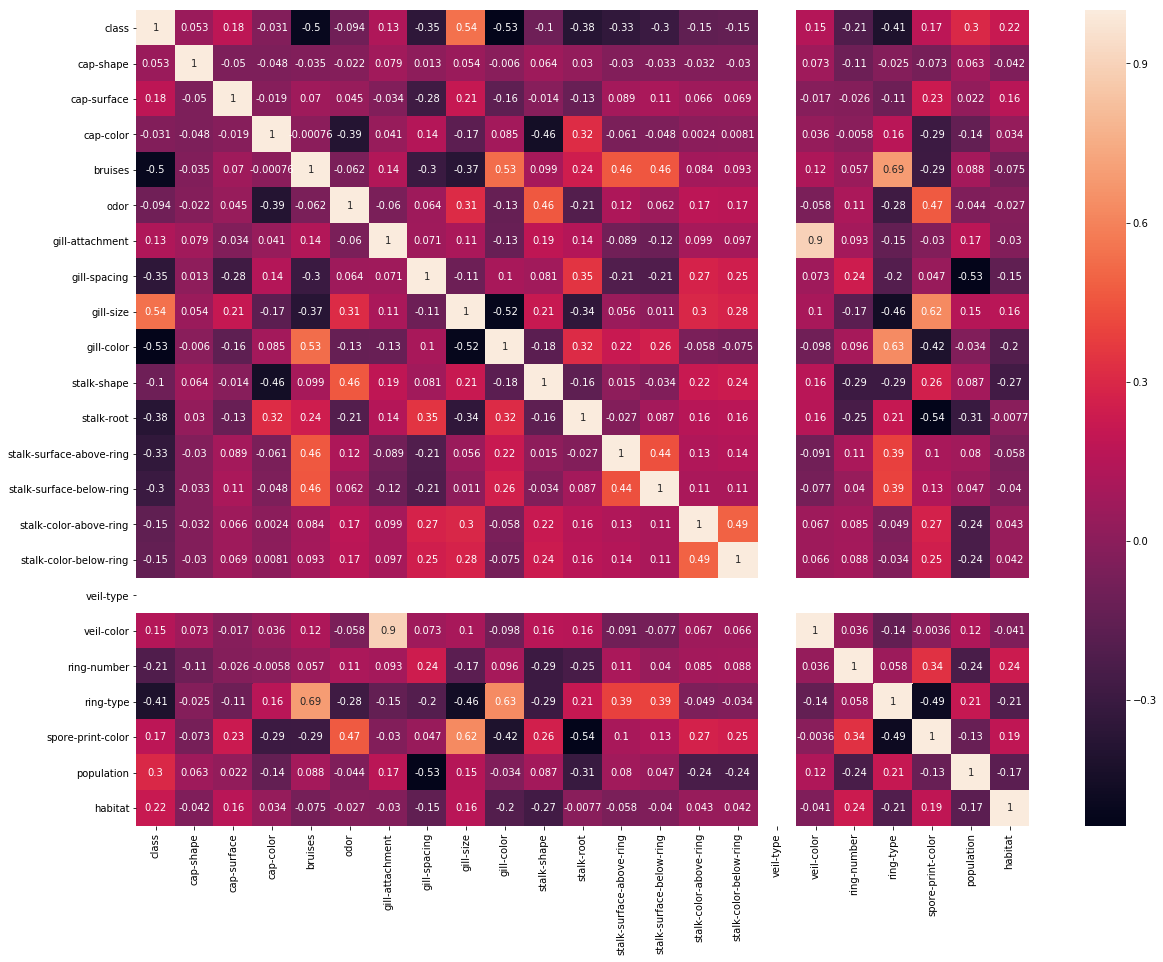

In [9]:
plt.figure(figsize=(20,15))
sns.heatmap(dataset.corr(),annot=True)
plt.show()
#dorp veil-type columns

In [10]:
# There are two classes Poisonous and edible (1: p, 0: e). There are 4208 p's and 3916 e's.
print(dataset.groupby('class').size())

class
0    4208
1    3916
dtype: int64


<font color = 'red'>TODO: Convert our dataframe (dataset) to matrices X and T </font>

In [11]:
X = dataset.iloc[:,1:23].values
T = dataset.iloc[:,0].values

<font color = 'red'>TODO: Normalize/Standardize the X matrix ONLY (Scale the data to be between -1 and 1). You may use Sklearn for this purpose. Refer to this link: <br> https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html </font>

<font color = 'red'> TODO: Further add 'ones' as bias to X </font>

In [12]:
#YOUR CODE...
#Your X matrix might look similar to mine...
SC = preprocessing.StandardScaler()
SC.fit(X)
X = SC.transform(X)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
#set n to length of column
n,m = X.shape
#make column of ones
XOnes = np.ones((n,1))
#add column to the front of X
X = np.hstack((XOnes,X))
X.shape

(8124, 23)

In [128]:
#You do not have to normalize the T matrix.
T.astype(float)

array([1., 0., 0., ..., 0., 1., 0.])

# Perceptron Model

<font color ='red'> TODO: Complete the Perceptron model. Refer to class notes for theory...</font>

In [204]:
""" 
    Perceptron Algorithm 

"""
maxiter = 1000
alpha = 0.01
w = np.zeros(X.shape[1])  
w.astype(float)
    #input x values and initial value (1)
    #multiply each x by the weight it corresponds to (1)w0, x1w1, x2w2,... ,xnwn
    #Take the summation of this last step for each n element
    #Step Function: If sum>threshold, return 1 else return 0

    #T is our y
    #X.iloc[:,0] is our Bias
    #X.iloc[:,1:22] is our X range x1,x2,x3.....,x21,x22
    
    #should I add an accuracy function?
    #w = w+alpha*T*X
# YOUR CODE...


def predicting(row,w):
    activate = w[0]
    for a in range(len(row)-1):
        activate += w[a+1]*row[a]
    return 1.0 if activate >= 0.0 else 0.0


#params: X trainging set, w weights initialized to 0,  alpha learning rate, epochs number of itterations
def train(X, alpha, epochs):
    for epoch in range(epochs):
        sum_error = 0.0
        for row in X:
            prediction = predicting(row, w)
            error = row[-1] - prediction
            sum_error += error**2
            w[0] = w[0] + alpha * error
            for b in range(len(row)-1):
                w[b+1]=w[b+1] + alpha *error * row[b]
        print('>epoch=%d, alpha=%.3f, error=%.10f' % (epoch, alpha, sum_error))
    return w

w = train(X, alpha, 65)
print (w)

#def train()
    #init weights to 0 or small value (this is done for us)
    #for each exmaple, get output given input and weight y(t)=f[w*x]
    #check outn stocastic grediant descent
    #T[a] = w*x
    #calc error = difference of predicted and desired output
    #update wweights w(t+1) = w(t) by adding the overall error (d-y(t)) times the prior innput x so w(t+1) = w(t) + (d-y(t))x

>epoch=0, alpha=0.010, error=7946.6786328908
>epoch=1, alpha=0.010, error=7988.4531070260
>epoch=2, alpha=0.010, error=7991.5731562864
>epoch=3, alpha=0.010, error=7992.7360351624
>epoch=4, alpha=0.010, error=7983.3101416982
>epoch=5, alpha=0.010, error=7989.4302540665
>epoch=6, alpha=0.010, error=7991.8788742745
>epoch=7, alpha=0.010, error=7984.7187454861
>epoch=8, alpha=0.010, error=7987.3502212262
>epoch=9, alpha=0.010, error=7984.5958830302
>epoch=10, alpha=0.010, error=7974.4356911339
>epoch=11, alpha=0.010, error=7974.1299731458
>epoch=12, alpha=0.010, error=7965.5612405696
>epoch=13, alpha=0.010, error=7968.7441592096
>epoch=14, alpha=0.010, error=7968.7441592096
>epoch=15, alpha=0.010, error=7963.2354828175
>epoch=16, alpha=0.010, error=7964.5212241495
>epoch=17, alpha=0.010, error=7969.9070380857
>epoch=18, alpha=0.010, error=7970.3356185297
>epoch=19, alpha=0.010, error=7977.7414722299
>epoch=20, alpha=0.010, error=7981.5358268460
>epoch=21, alpha=0.010, error=7984.290165042

In [205]:
#X is the training data, w  is the weights, n is the size of X
def predict(X, w, n):
    
    y = (X*w)/n
    """ Predicting the label for the input data """
    return np.where(np.dot(X, w) >= 0.0, 1, 0)               
                
                

In [206]:
(cLen, rLen) = X.shape
y = predict(X, w, cLen)
print(y)

[0 1 1 ... 1 0 1]


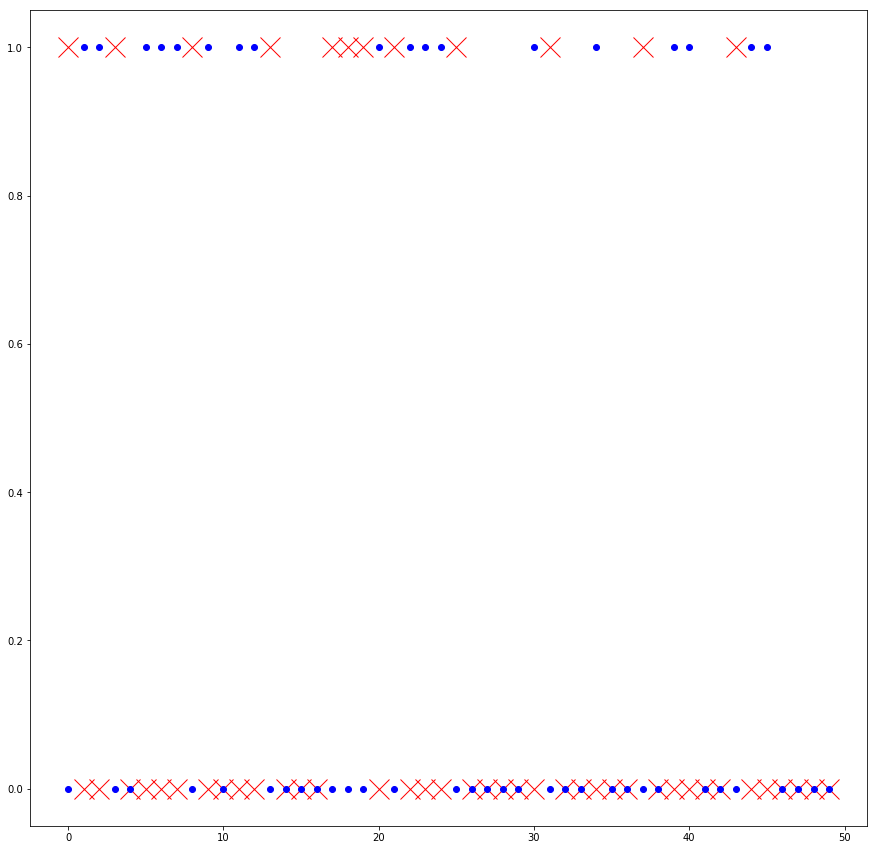

In [207]:
# I plotted the first 50 entries of both y(predicited value corresponding to T) and T. Here's how it looked like...
plt.figure(figsize=(15, 15))
plt.plot(T[:50], 'xr', markersize = 20)
plt.plot(y[:50], 'ob')

# Pocket Algorithm

<font color = 'red'>TODO: Complete the Pocket Model </font><br>

The idea is straightforward: this algorithm keeps the best result seen so far in its pocket (that is why it is called Pocket Learning Algorithm). The best result means the number of misclassification is minimum. If the new weights produce a smaller number of misclassification than the weights in the pocket, then replace the weights in the pocket to the new weights; if the new weights are not better than the one in the pocket, keep the one in the pocket and discard the new weights. At the end of the training iteration, the algorithm returns the solution in the pocket, rather than the last solution. <br>

Here's a pseudocode...<br>

1. Initialize the pocket weight vector, W_{pocket}, to 0 or small random numbers and use this weight vector as the initialized weight vector, W_0 of Perceptron Learning Algorithm.
2. For each training iteration, perform the following sub-steps:
	1. Run the training step of Perceptron Learning Algorithm to obtain the updated weight vector, W_t, where t indicates the current iteration.
	2. Evaluate W_t by comparing the number of misclassification on the entire sample set with the number of misclassification performed by W_{pocket}.
	3. If W_t is better than W_{pocket}, replace W_{pocket} to W_t.
3. Return W_{pocket} when the training iteration terminates. <br>


<font color = 'red'> HINT while implementation: Pocket algorithm might take a lot of time to train (Be patient!). Hence it is better if you print the iterations along while training. 


In [163]:
""" 
    Pocket Algorithm 

"""

#I coudn't successfuylly finish the pocket method, I'm having trouble implementing the storage of the highest w


from copy import deepcopy as copy 


maxiter = 100
alpha = 0.01
w = np.zeros(X.shape[1])
w_pocket = copy(w)

# return 1 if w is better -1 if wp is better
def compare(X, T, w, wp):
    y = np.sign(np.dot(X,w))
    yp = np.sign(np.dot(X, wp))

    return 1 if np.sum(y == T) >= np.sum(yp == T) else -1

#YOUR CODE...

def predicting(row,w):
    activate = w[0]
    for a in range(len(row)-1):
        activate += w[a+1]*row[a]
    return 1.0 if activate >= 0.0 else 0.0


#params: X trainging set, w weights initialized to 0,  alpha learning rate, epochs number of itterations
def train(X, w, alpha, epochs):
    w.astype(float)
    
    for epoch in range(epochs):
        sum_error = 0.0
        for row in X:
            prediction = predicting(row, w)
            error = row[-1] - prediction
            sum_error += error**2
            
            w[0] = w[0] + alpha * error
            for b in range(len(row)-1):
                #update the weight
                w[b+1]=w[b+1] + alpha *error * row[b]
            
        print('>epoch=%d, alpha=%.3f, error=%.10f' % (epoch, alpha, sum_error))
    return w

print (train(X, w_pocket, alpha, 65))
    

>epoch=0, alpha=0.100, error=7946.6786328908
>epoch=1, alpha=0.100, error=7988.4531070260
>epoch=2, alpha=0.100, error=7991.5731562864
>epoch=3, alpha=0.100, error=7992.7360351624
>epoch=4, alpha=0.100, error=7983.3101416982
>epoch=5, alpha=0.100, error=7989.4302540665
>epoch=6, alpha=0.100, error=7991.8788742745
>epoch=7, alpha=0.100, error=7984.7187454861
>epoch=8, alpha=0.100, error=7987.3502212262
>epoch=9, alpha=0.100, error=7984.5958830302
[-1398.1        -1398.1          -51.65750585   527.43432806
   177.51619629  -346.50348973  -168.51076807  -119.14867492
 -1001.47918277   652.07908829  -857.90014382 -1690.57704209
   600.07809398  -304.40934293  -232.94133799   129.76147392
   131.55423278     0.          -175.08599631   973.51339505
 -1134.94296284   467.59761485  -888.95881036]


In [164]:
(n,m) = X.shape
y_pocket = predict(X, w_pocket, n)

In [165]:
y_pocket

array([0, 1, 1, ..., 1, 0, 1])

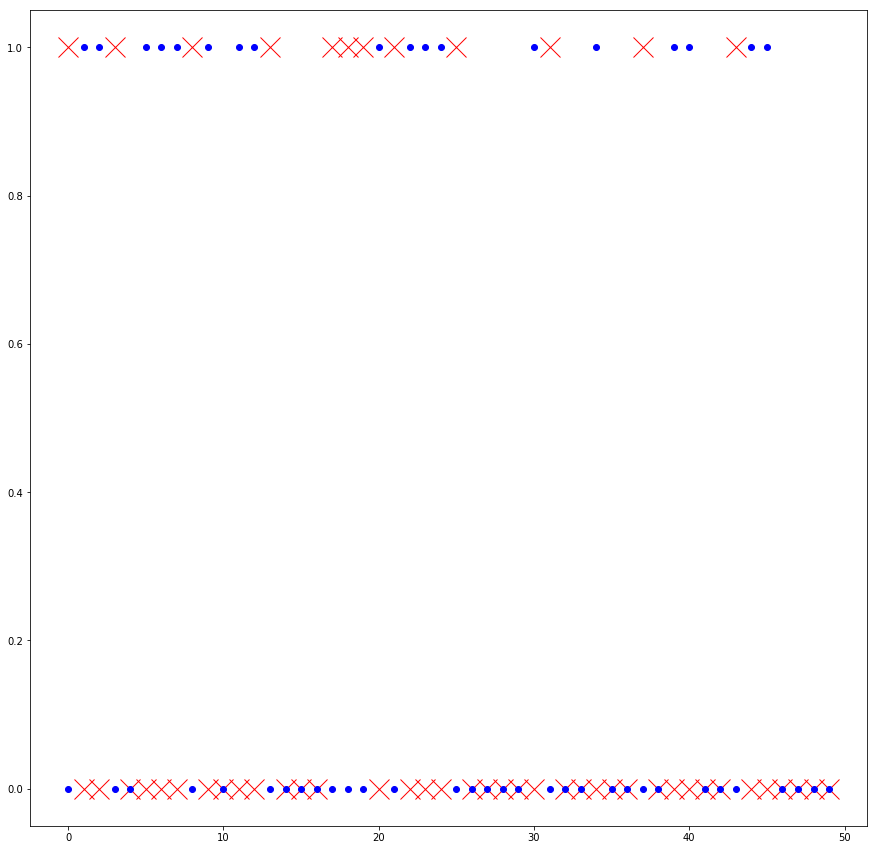

In [166]:
# I plotted the first 50 entries of both y(predicited value corresponding to T) and T. Here's how it looked like...
plt.figure(figsize=(15, 15))
plt.plot(T[:50], 'xr', markersize = 20)
plt.plot(y[:50], 'ob')

<font color = 'red'> Note that our algorithm does not seem to have good accuracy. But it is fine as practically it is very difficult to find an exactly linearly seperable dataset.</font>

In [153]:
# Print out your confusion matrix using this code...
def confusion_matrix(Y, T):
    """
        Y    nd.array
             predicted labels
        T    nd.array
             target labels
             
        @cfm DataFrame
             confusion matrix
    """
    
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

In [154]:
confusion_matrix(y, T)

,0,1
0,1784,2497
1,2424,1419


In [155]:
confusion_matrix(y_pocket, T)

,0,1
0,0,0
1,4208,3916
